In [ ]:
# !pip install plotly.plotly
!pip install yfinance

     |████████████████████████████████| 6.3MB 21.7MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=68b94ae1573bef4611bcc26d427653b1799df422c010fd02ccb6111e09ab6fb4
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import pandas as pd
import yfinance as yf
import datetime as dt
import pprint 

In [ ]:
stock_code = 'AMZN'
d = yf.Ticker(stock_code)

df = d.history(start='2020-01-01', end='2021-05-09')
# pprint.pprint(d.info)

df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02,1875.000000,1898.010010,1864.150024,1898.010010,4029000,0,0
2020-01-03,1864.500000,1886.199951,1864.500000,1874.969971,3764400,0,0
2020-01-06,1860.000000,1903.689941,1860.000000,1902.880005,4061800,0,0
2020-01-07,1904.500000,1913.890015,1892.040039,1906.859985,4044900,0,0
2020-01-08,1898.040039,1911.000000,1886.439941,1891.969971,3508000,0,0


In [ ]:
df['Per Change'] = (df['Close'].pct_change() * 100)
df.head(-1)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Per Change
Date,,,,,,,,
2020-01-02,1875.000000,1898.010010,1864.150024,1898.010010,4029000,0,0,NaN
2020-01-03,1864.500000,1886.199951,1864.500000,1874.969971,3764400,0,0,-1.213905
2020-01-06,1860.000000,1903.689941,1860.000000,1902.880005,4061800,0,0,1.488559
2020-01-07,1904.500000,1913.890015,1892.040039,1906.859985,4044900,0,0,0.209156
2020-01-08,1898.040039,1911.000000,1886.439941,1891.969971,3508000,0,0,-0.780866
...,...,...,...,...,...,...,...,...
2021-04-30,3525.120117,3554.000000,3462.500000,3467.419922,7001800,0,0,-0.112065
2021-05-03,3484.729980,3486.649902,3372.699951,3386.489990,5875500,0,0,-2.334010
2021-05-04,3356.189941,3367.979980,3272.129883,3311.870117,5439400,0,0,-2.203458


In [ ]:
# Calculating RSI
# Formula 100 - [100 / 1 + (Avg Gain/Avg Loss)]
# Default Look back period days passed in current month

dd = yf.Ticker(stock_code)
    
df1 = dd.history(period='1mo')
change = df1['Close'].diff().dropna()

In [ ]:
gain = change.apply(lambda x : x if x > 0 else 0)
index_names = gain[ gain == 0 ].index
gain.drop(index_names, inplace = True)

loss = change.apply(lambda x : x if x < 0 else 0)
index_names1 = loss[ loss == 0 ].index
loss.drop(index_names1, inplace = True)
loss = loss.abs()

In [ ]:
avg_gain = gain.mean()
avg_loss = loss.mean()

In [ ]:
avg_gain

32.71417236328125

In [ ]:
avg_loss

44.47333441840278

In [ ]:
avg_g_l = 1 + (avg_gain/avg_loss)
RSI = 100 - (100 / avg_g_l) 

In [ ]:
RSI

42.38272970237207

In [ ]:
def RSI_calc(st_name):
  dd = yf.Ticker(st_name)
    
  df1 = dd.history(period='1mo')
  change = df1['Close'].diff().dropna()

  gain = change.apply(lambda x : x if x > 0 else 0)
  index_names = gain[ gain == 0 ].index
  gain.drop(index_names, inplace = True)

  loss = change.apply(lambda x : x if x < 0 else 0)
  index_names1 = loss[ loss == 0 ].index
  loss.drop(index_names1, inplace = True)
  loss = loss.abs()

  avg_gain = gain.mean()
  avg_loss = loss.mean()

  avg_g_l = 1 + (avg_gain/avg_loss)
  RSI = 100 - (100 / avg_g_l) 

  return RSI

In [ ]:
RSI_calc('AAPL')

47.731606494255765

In [ ]:
# Reversing df

d = yf.Ticker(stock_code)

df = d.history(start='2020-01-01', end='2021-05-09')
df['Change'] = (df['Close'].diff())
df['% Change'] = (df['Close'].pct_change() * 100)
# pprint.pprint(d.info)
df = df.reindex(index=df.index[::-1])

In [ ]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Change,% Change
Date,,,,,,,,,
2021-05-07,3319.090088,3330.889893,3289.070068,3291.610107,4706800,0,0,-14.760010,-0.446411
2021-05-06,3270.000000,3314.399902,3247.199951,3306.370117,4447700,0,0,35.830078,1.095540
2021-05-05,3338.860107,3354.699951,3264.360107,3270.540039,3711300,0,0,-41.330078,-1.247938
2021-05-04,3356.189941,3367.979980,3272.129883,3311.870117,5439400,0,0,-74.619873,-2.203458
2021-05-03,3484.729980,3486.649902,3372.699951,3386.489990,5875500,0,0,-80.929932,-2.334010


In [ ]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Change,% Change
Date,,,,,,,,,
2021-05-07,3319.090088,3330.889893,3289.070068,3291.610107,4706800,0,0,-14.760010,-0.446411
2021-05-06,3270.000000,3314.399902,3247.199951,3306.370117,4447700,0,0,35.830078,1.095540
2021-05-05,3338.860107,3354.699951,3264.360107,3270.540039,3711300,0,0,-41.330078,-1.247938
2021-05-04,3356.189941,3367.979980,3272.129883,3311.870117,5439400,0,0,-74.619873,-2.203458
2021-05-03,3484.729980,3486.649902,3372.699951,3386.489990,5875500,0,0,-80.929932,-2.334010
...,...,...,...,...,...,...,...,...,...
2020-01-08,1898.040039,1911.000000,1886.439941,1891.969971,3508000,0,0,-14.890015,-0.780866
2020-01-07,1904.500000,1913.890015,1892.040039,1906.859985,4044900,0,0,3.979980,0.209156
2020-01-06,1860.000000,1903.689941,1860.000000,1902.880005,4061800,0,0,27.910034,1.488559


In [ ]:
df.index

DatetimeIndex(['2021-05-07', '2021-05-06', '2021-05-05', '2021-05-04',
               '2021-05-03', '2021-04-30', '2021-04-29', '2021-04-28',
               '2021-04-27', '2021-04-26',
               ...
               '2020-01-15', '2020-01-14', '2020-01-13', '2020-01-10',
               '2020-01-09', '2020-01-08', '2020-01-07', '2020-01-06',
               '2020-01-03', '2020-01-02'],
              dtype='datetime64[ns]', name='Date', length=340, freq=None)

In [ ]:
df.reindex()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Change,% Change
Date,,,,,,,,,
2021-05-07,3319.090088,3330.889893,3289.070068,3291.610107,4706800,0,0,-14.760010,-0.446411
2021-05-06,3270.000000,3314.399902,3247.199951,3306.370117,4447700,0,0,35.830078,1.095540
2021-05-05,3338.860107,3354.699951,3264.360107,3270.540039,3711300,0,0,-41.330078,-1.247938
2021-05-04,3356.189941,3367.979980,3272.129883,3311.870117,5439400,0,0,-74.619873,-2.203458
2021-05-03,3484.729980,3486.649902,3372.699951,3386.489990,5875500,0,0,-80.929932,-2.334010
...,...,...,...,...,...,...,...,...,...
2020-01-08,1898.040039,1911.000000,1886.439941,1891.969971,3508000,0,0,-14.890015,-0.780866
2020-01-07,1904.500000,1913.890015,1892.040039,1906.859985,4044900,0,0,3.979980,0.209156
2020-01-06,1860.000000,1903.689941,1860.000000,1902.880005,4061800,0,0,27.910034,1.488559


In [ ]:
df['Date'] = df.index

In [ ]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Change,% Change,Date
Date,,,,,,,,,,
2021-05-07,3319.090088,3330.889893,3289.070068,3291.610107,4706800,0,0,-14.760010,-0.446411,2021-05-07
2021-05-06,3270.000000,3314.399902,3247.199951,3306.370117,4447700,0,0,35.830078,1.095540,2021-05-06
2021-05-05,3338.860107,3354.699951,3264.360107,3270.540039,3711300,0,0,-41.330078,-1.247938,2021-05-05
2021-05-04,3356.189941,3367.979980,3272.129883,3311.870117,5439400,0,0,-74.619873,-2.203458,2021-05-04
2021-05-03,3484.729980,3486.649902,3372.699951,3386.489990,5875500,0,0,-80.929932,-2.334010,2021-05-03
...,...,...,...,...,...,...,...,...,...,...
2020-01-08,1898.040039,1911.000000,1886.439941,1891.969971,3508000,0,0,-14.890015,-0.780866,2020-01-08
2020-01-07,1904.500000,1913.890015,1892.040039,1906.859985,4044900,0,0,3.979980,0.209156,2020-01-07
2020-01-06,1860.000000,1903.689941,1860.000000,1902.880005,4061800,0,0,27.910034,1.488559,2020-01-06


In [ ]:
# Calculating Simple Moving Average (SMA)
# Calculating currnt month SMA
dd = yf.Ticker(stock_code)
    
df1 = dd.history(period='1mo')
change = df1['Close'].diff().dropna()

In [ ]:
df1.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-04-08,3310.899902,3324.500000,3292.000000,3299.300049,2812100,0,0
2021-04-09,3304.699951,3372.199951,3288.899902,3372.199951,4334600,0,0
2021-04-12,3355.209961,3395.040039,3351.149902,3379.389893,3281800,0,0
2021-04-13,3400.850098,3432.000000,3395.629883,3400.000000,3315800,0,0
2021-04-14,3404.040039,3404.129883,3326.000000,3333.000000,3145200,0,0


In [ ]:
df1.dropna()
sma = df1.Close.sum()/len(df1)
sma

3366.8909135298295

In [ ]:
df1.Close.mean()

3366.8909135298295

In [ ]:
r,c = df1.shape
r

22

In [ ]:
dd = yf.Ticker('AMZN')
        
df1 = dd.history(period='30d')
# change = df1['Close'].diff().dropna()

In [ ]:
df1.shape

(30, 7)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import plotly.offline as pyo
import plotly.graph_objs as go

In [ ]:
tmp

Date
2020-11-12    0.000000
2020-11-13    0.003181
2020-11-16    0.071160
2020-11-17    0.051978
2020-11-18   -0.049572
                ...   
2021-05-06   -0.865112
2021-05-07   -0.777733
2021-05-10   -0.909111
2021-05-11   -1.014203
2021-05-12   -1.222111
Name: Close, Length: 124, dtype: float64

In [ ]:
dd = yf.Ticker('AAPL')
        
df1 = dd.history(period='6mo')

exp1 = df1.Close.ewm(span=12, adjust=False).mean()
exp2 = df1.Close.ewm(span=26, adjust=False).mean()
macd = exp1 - exp2

exp3 = macd.ewm(span=9, adjust=False).mean() 

macd_diff = macd - exp3

trace0 = go.Scatter(
   x = macd.index,
   y = macd,
   mode = 'lines',
   name = 'MACD Line' 
)

trace1 = go.Scatter(
   x = exp3.index,
   y = exp3,
   mode = 'lines',
   name = 'MACD Signal Line' 
)

# trace2 = go.Figure(data=[go.Histogram(x=tmp)])

data  = [trace0, trace1]
layout = go.Layout(title='hahaha')

fig = go.Figure(data=data, layout=layout)

# pyo.plot(fig)
fig

In [ ]:
# 
newX = pd.DataFrame()
newX['diff'] = macd_diff
newX['shift'] = macd_diff.shift(-1)
newX['buy/sell'] = 0
# newX
# newX['buy/sell'] = newX.apply(lambda x : 1 if (x['diff'] > 0 and x['shift'] < 0) else -1 )
newX['buy/sell'] = newX.apply(lambda ro : set_val(ro), axis=1)

In [ ]:
buy = newX[newX['buy/sell'] == 1].shape[0]
sell = newX[newX['buy/sell'] == -1].shape[0]
sell

3

In [ ]:
# buy = 1 sell -1
def set_val(ro):
  if ro['diff'] > 0 and ro['shift'] < 0:
    return 1
  if ro['diff'] < 0 and ro['shift'] > 0:
    return -1
  return 0


In [ ]:
newX['buy/sell'].unique()

array([ 0,  1, -1])

In [ ]:
newX[newX['buy/sell'] == 0]

,diff,shift,buy/sell
Date,,,
2020-11-13,0.000000,0.066159,0
2020-11-16,0.066159,0.046118,0
2020-11-18,-0.055632,-0.077815,0
2020-11-19,-0.077815,-0.170290,0
2020-11-20,-0.170290,-0.440903,0
...,...,...,...
2021-05-06,-0.865110,-0.777730,0
2021-05-07,-0.777730,-0.909108,0
2021-05-10,-0.909108,-1.014201,0


In [ ]:
# Recomondation part
def set_val(ro):
  if ro['diff'] > 0 and ro['shift'] < 0:
    return 1
  if ro['diff'] < 0 and ro['shift'] > 0:
    return -1
  return 0



st_name = 'AAPL'
rsi = RSI_calc(st_name)
# get MACD_diff
if (rsi <= 30 or rsi >= 70):
  if (rsi <= 30):
    print('Oversold')
  elif (rsi <= 35):
    print('Buy')
  elif (rsi >= 70):
    print('Overbought')
  elif (rsi >= 65):
    Preint('sell')

else:

  newX = pd.DataFrame()
  newX['diff'] = macd_diff
  newX['shift'] = macd_diff.shift(-1)
  newX['buy/sell'] = 0
  # newX
  # newX['buy/sell'] = newX.apply(lambda x : 1 if (x['diff'] > 0 and x['shift'] < 0) else -1 )
  newX['buy/sell'] = newX.apply(lambda ro : set_val(ro), axis=1)

  buy = newX[newX['buy/sell'] == 1].shape[0]
  sell = newX[newX['buy/sell'] == -1].shape[0]

  if (buy > sell):
    print('buy')
  else:
    print('sell')


buy


In [ ]:
macd_diff

Date
2020-11-12    0.000000
2020-11-13    0.003181
2020-11-16    0.071160
2020-11-17    0.051978
2020-11-18   -0.049572
                ...   
2021-05-06   -0.865112
2021-05-07   -0.777733
2021-05-10   -0.909111
2021-05-11   -1.014203
2021-05-12   -1.243694
Name: Close, Length: 124, dtype: float64

In [ ]:
# buy = 0
# sell = 0

# for curr in range(len(macd_diff)-1):
#   for next in range(i+1,):
#     if(macd_diff[next] == 0):
#       buy = buy
#       sell = sell
#     elif(macd_diff[curr] > 0 and macd_diff[next] > 0):
#       buy = buy
#       sell = sell
#     elif(macd_diff[curr] < 0 and macd_diff[next] < 0):
#       buy = buy
#       sell = sell
#     elif(macd_diff[curr] < 0 and macd_diff[next] > 0):
#       sell = sell + 1
#     elif(macd_diff[curr] > 0 and macd_diff[next] < 0):
#       buy = buy + 1

# print(buy)
# print(sell)

64
0


In [ ]:
macd_diff['XX'] = macd_diff.shift()

In [ ]:
macd_diff.head(20)

Date
2020-11-12 00:00:00             0
2020-11-13 00:00:00    0.00318085
2020-11-16 00:00:00     0.0711597
2020-11-17 00:00:00     0.0519784
2020-11-18 00:00:00    -0.0495722
2020-11-19 00:00:00    -0.0719933
2020-11-20 00:00:00     -0.164982
2020-11-23 00:00:00     -0.436267
2020-11-24 00:00:00     -0.498102
2020-11-25 00:00:00     -0.453544
2020-11-27 00:00:00     -0.362689
2020-11-30 00:00:00     -0.125882
2020-12-01 00:00:00      0.267249
2020-12-02 00:00:00       0.52658
2020-12-03 00:00:00      0.655447
2020-12-04 00:00:00      0.659304
2020-12-07 00:00:00      0.722417
2020-12-08 00:00:00      0.762371
2020-12-09 00:00:00      0.578504
2020-12-10 00:00:00      0.520943
Name: Close, dtype: object

In [ ]:
  for i in range(len(macd_diff)-1):
    for j in range(i+1,len(macd_diff)):
      print(macd_diff)
      print(macd_diff[j])
      break

0.0
0.003180853254093563
0.003180853254093563
0.0711596735371586
0.0711596735371586
0.05197844682137884
0.05197844682137884
-0.04957218519357502
-0.04957218519357502
-0.07199327578535376
-0.07199327578535376
-0.16498247200216348
-0.16498247200216348
-0.4362665621456455
-0.4362665621456455
-0.4981018058660866
-0.4981018058660866
-0.45354437394540925
-0.45354437394540925
-0.3626887615741029
-0.3626887615741029
-0.1258824652769911
-0.1258824652769911
0.2672489748003016
0.2672489748003016
0.526580356142715
0.526580356142715
0.6554471051449231
0.6554471051449231
0.6593039205307779
0.6593039205307779
0.7224169119383443
0.7224169119383443
0.7623711901297767
0.7623711901297767
0.5785035145277732
0.5785035145277732
0.5209434626986126
0.5209434626986126
0.39870359836792324
0.39870359836792324
0.2541454093834714
0.2541454093834714
0.530722187669439
0.530722187669439
0.6630498167188186
0.6630498167188186
0.7575859849715534
0.7575859849715534
0.6353634298365687
0.6353634298365687
0.6118862939510752

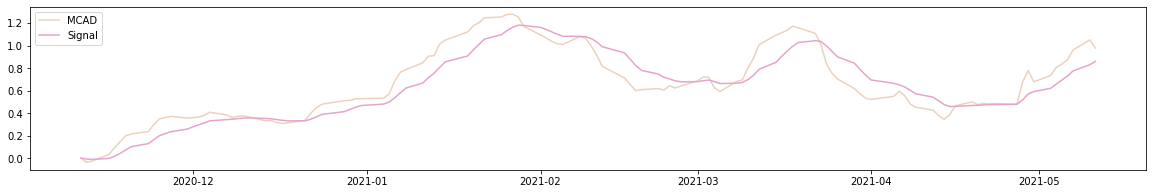

In [ ]:
fig1 = plt.plot(df1.index,macd, label = 'MCAD',color = '#EBD2BE')
fig2 = plt.plot(df1.index,exp3, label = 'Signal',color='#E5A4CB')
plt.legend(loc = 'upper left')
# plt.rcParams["figure.figsize"] = (20,3)
fig1
fig2

In [ ]:
trace0 = go.Scatter(
   x = macd.index,
   y = macd,
   mode = 'lines',
   name = 'MACD Line' 
)

trace1 = go.Scatter(
   x = exp3.index,
   y = exp3,
   mode = 'lines',
   name = 'MACD Signal Line'
)

data  = [trace0, trace1]
layout = go.Layout(title='hahaha')

fig = go.Figure(data=data, layout=layout)

# pyo.plot(fig)
fig

In [ ]:
df1.index.min()

Timestamp('2020-05-12 00:00:00')

In [ ]:
dd = yf.Ticker('AAPL')
        
df1 = dd.history(period='5y')

trace0 = go.Scatter(
   x = df1.index,
   y = df1.Close,
   mode = 'lines',
   name = 'MACD Line',
)

data  = [trace0]
layout = go.Layout(title='hahaha')

fig = go.Figure(data=data, layout=layout)
fig.update_layout(xaxis_range=[df1.index.min(),df1.index.max()])

fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     step="day",
                     stepmode="backward"),
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
    )
)
# pyo.plot(fig)
fig

In [ ]:
dd = yf.Ticker('AAPL')
        
df1 = dd.history(period='1y')



fig = go.Figure( data=[ 
                go.Candlestick(
                  x = df1.index,
                  low = df1['Low'],
                  high = df1['High'],
                  open = df1['Open'],
                  close = df1['Close'],
                  increasing_line_color = 'green',
                  decreasing_line_color = 'red'
                )
])
fig.update_layout(xaxis_range=[df1.index.min(),df1.index.max()])
fig